# Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.facecolor'] = 'white'

## Load data

In [3]:
yr = '2024'

In [4]:
pk_df = pd.read_csv('data/BDC_' + yr + '_Penalty_Kill_Statistics.csv', index_col=0)
pk_df.drop('Penalty ID', axis=1, inplace=True)

In [5]:
pk_df['Lineup Composition'] = pd.read_csv('data/BDC_' + yr + '_Lineup.csv')['% Forwards']

## Define control
Summarized as: seized opportunities to enter or exit the zone in a controlled manner
Should I split by zone?

In [6]:
pk_df['Control'] = (
    (
        pk_df['Controlled entry F']
        + pk_df['Failed controlled entry F']
        + pk_df['Controlled exit F']
        + pk_df['Failed controlled exit F']
        + pk_df['Neutral zone pass F']
        + pk_df['Failed neutral zone pass F']
        + pk_df['Cycle back F']
        + pk_df['Failed cycle back F']
    ) / 
    (
        (
            pk_df['Controlled entry F'] 
            + pk_df['Failed controlled entry F']
            + pk_df['Controlled exit F']
            + pk_df['Failed controlled exit F']
            + pk_df['Neutral zone pass F']
            + pk_df['Failed neutral zone pass F']
            + pk_df['Cycle back F']
            + pk_df['Failed cycle back F']
        ) +
        (
            pk_df['Dump out F']
            + pk_df['Failed dump out F']
            + pk_df['Dump F']
            + pk_df['Failed dump F']
            + pk_df['Dump in F']
            + pk_df['Failed dump in F']
            + pk_df['Dump back F']
            + pk_df['Failed dump back F']
        )
    )
)

In [7]:
pk_df['Exit Control'] = (
    (
        pk_df['Controlled exit F']
        + pk_df['Failed controlled exit F']
    ) / 
    (
        (
            pk_df['Controlled exit F']
            + pk_df['Failed controlled exit F']
        ) +
        (
            pk_df['Dump out F']
            + pk_df['Failed dump out F']
        )
    )
)

In [8]:
pk_df['Neutral Control'] = (
    (
        pk_df['Neutral zone pass F']
        + pk_df['Failed neutral zone pass F']
        + pk_df['Cycle back F']
        + pk_df['Failed cycle back F']
    ) / 
    (
        (
            pk_df['Neutral zone pass F']
            + pk_df['Failed neutral zone pass F']
            + pk_df['Cycle back F']
            + pk_df['Failed cycle back F']
        ) +
        (
            pk_df['Dump F']
            + pk_df['Failed dump F']
            + pk_df['Dump back F']
            + pk_df['Failed dump back F']
        )
    )
)

In [9]:
pk_df['Entry Control'] = (
    (
        pk_df['Controlled entry F']
        + pk_df['Failed controlled entry F']
    ) / 
    (
        (
            pk_df['Controlled entry F'] 
            + pk_df['Failed controlled entry F']
        ) +
        (
            pk_df['Dump in F']
            + pk_df['Failed dump in F']
        )
    )
)

## Add penalty kill aggressiveness
Interpreted as: seized opportunities enter the zone in a controlled manner

In [10]:
pk_df['Aggressiveness'] = (
    (pk_df['Controlled entry F'] + pk_df['Failed controlled entry F']) / 
    (pk_df['Controlled entry A'] + pk_df['Dump A'] + pk_df['Dump in A'])
)

In [11]:
pk_df.loc[
    :, 
    (
         'Control',
         'Exit Control',
         'Neutral Control',
         'Entry Control',
         'Aggressiveness', 
         # 'Lineup Composition',
         'Possession (%)',
         'Corsi', 
         'Corsi Against',
         'Fenwick Against',
         'Time in D Zone',
    )
].to_csv('data/BDC_' + yr + '_Analysis.csv')

## Normalize

In [12]:
pk_df.fillna(0, inplace=True)
pk_df = (pk_df - pk_df.min()) / (pk_df.max() - pk_df.min())
pk_df.fillna(0, inplace=True)

## Correlations

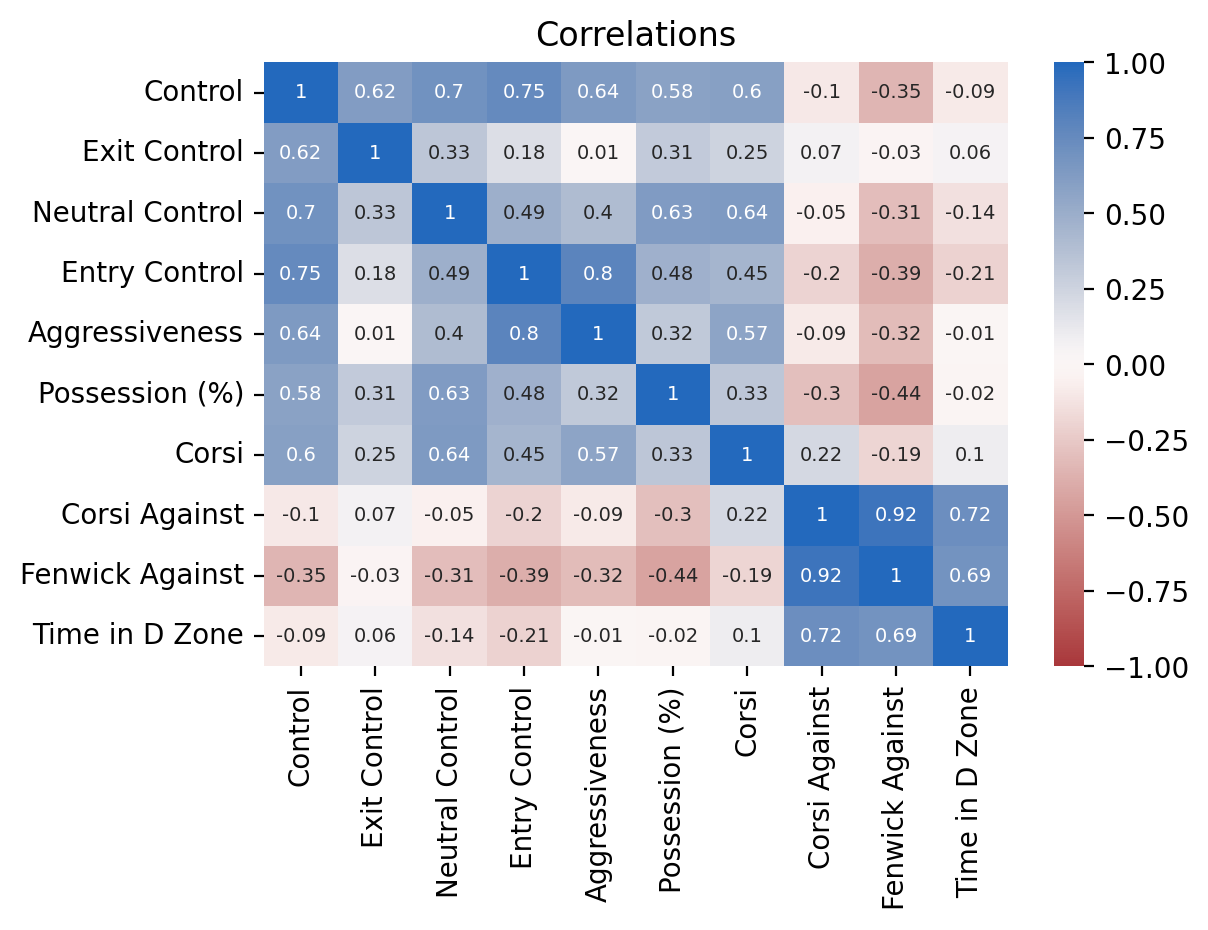

In [19]:
corr = pk_df.loc[:, 
                 (
                     'Control',
                     'Exit Control',
                     'Neutral Control',
                     'Entry Control',
                     'Aggressiveness', 
                     # 'Lineup Composition',
                     'Possession (%)',
                     # 'Time in O Zone',
                     'Corsi', 
                     'Corsi Against',
                     'Fenwick Against',
                     'Time in D Zone',
                 )
                ].corr()
g = sns.heatmap(corr.round(2), annot=True, cmap='vlag_r', annot_kws={'size': 7}, vmin=-1, vmax=1)
g.set_title('Correlations')
plt.show()
# g.figure.savefig('results/BDC_' + yr + '_Correlations_8.png', bbox_inches="tight")

In [ ]:
# g = sns.pairplot(
#     pk_df.loc[:, 
#          (
#              'Control',
#              'Exit Control',
#              'Neutral Control',
#              'Entry Control',
#              'Aggressiveness', 
#              'Lineup Composition',
#              '% Possession F',
#              'Shots F', 
#              'Shots A',
#              'Fenwick A',
#              'Time in D Zone',
#          )
#     ]
# )

## Extra Figures

In [17]:
clrs = sns.color_palette('vlag_r') 

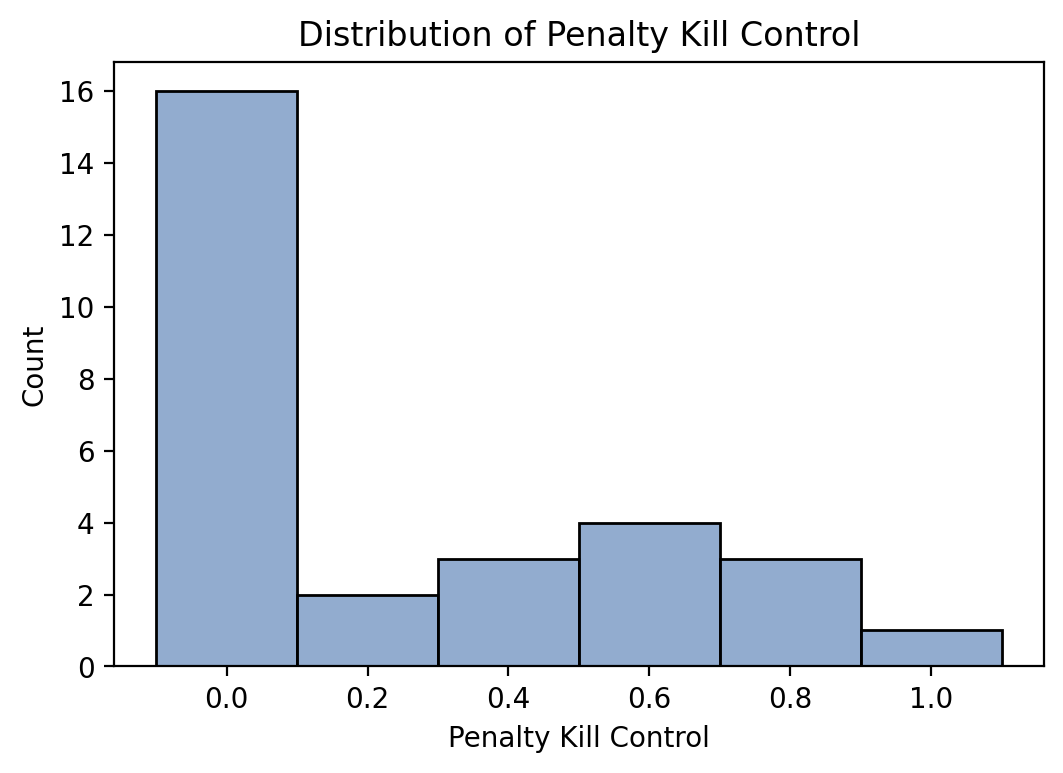

In [18]:
g = sns.histplot(data=pk_df, x='Control', bins=np.arange(-0.1, 1.1, 0.2), color=clrs[5])
plt.xlabel('Penalty Kill Control')
plt.title('Distribution of Penalty Kill Control')
plt.show()
g.figure.savefig('results/Control_Distribution.png')

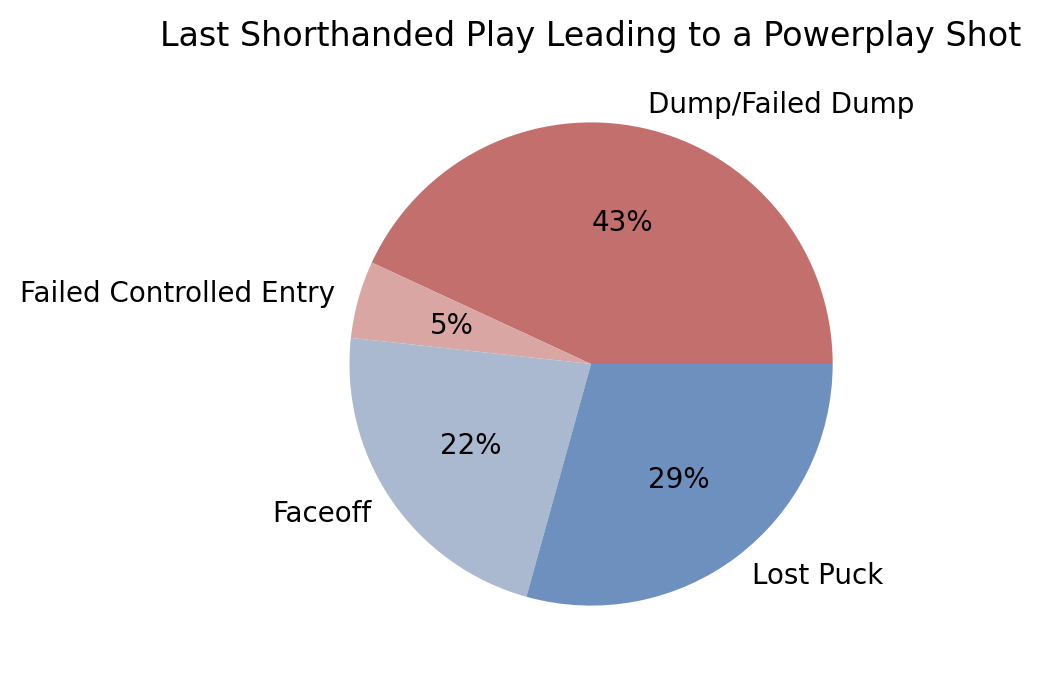

In [16]:
# data extracted manually
data = [25, 3, 13, 17] 
keys = ['Dump/Failed Dump', 'Failed Controlled Entry', 'Faceoff', 'Lost Puck'] 

plt.pie(data, labels=keys, colors=[clrs[0], clrs[1], clrs[4], clrs[5]], autopct='%.0f%%') 
plt.title('Last Shorthanded Play Leading to a Powerplay Shot')
# plt.savefig('results/Play_Pie_Chart.png')
plt.show() 